<a href="https://colab.research.google.com/github/Iramira/Homework/blob/main/read_data_Buldakova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./owid-covid-data.csv', index_col='date', parse_dates = True)
df

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,ZWE,Africa,Zimbabwe,133836.0,0.0,31.571,4704.0,0.0,0.714,8867.909,0.000,2.092,311.685,0.000,0.047,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4152.0,1449073.0,96.015,0.275,2788.0,0.185,0.011,88.3,tests performed,6560442.0,3765392.0,2795050.0,NaN,16111.0,23490.0,43.47,24.95,18.52,NaN,1556.0,16225.0,0.108,47.22,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2021-11-28,ZWE,Africa,Zimbabwe,133951.0,115.0,43.429,4705.0,1.0,0.857,8875.529,7.620,2.878,311.751,0.066,0.057,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1044.0,1450117.0,96.084,0.069,2764.0,0.183,0.016,63.6,tests performed,6568694.0,377088

In [3]:
df.location.value_counts().index

Index(['Peru', 'Mexico', 'Argentina', 'Thailand', 'Taiwan', 'South Korea',
       'World', 'Lower middle income', 'China', 'Upper middle income',
       ...
       'Tuvalu', 'Cook Islands', 'Bonaire Sint Eustatius and Saba', 'Nauru',
       'Tokelau', 'Palau', 'Saint Helena', 'Pitcairn', 'Falkland Islands',
       'Niue'],
      dtype='object', length=237)

In [4]:
df = df[df.location=='Qatar']

In [5]:
df

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-29,QAT,Asia,Qatar,1.0,1.0,NaN,NaN,NaN,NaN,0.341,0.341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,2930524.0,227.322,31.9,1.307,0.617,116935.6,NaN,176.69,16.52,0.8,26.9,NaN,1.2,80.23,0.848,13.8,3.67,7.9,4.709055
2020-03-01,QAT,Asia,Qatar,3.0,2.0,NaN,NaN,NaN,NaN,1.024,0.682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,2930524.0,227.322,31.9,1.307,0.617,116935.6,NaN,176.69,16.52,0.8,26.9,NaN,1.2,80.23,0.848,NaN,NaN,NaN,NaN
2020-03-02,QAT,Asia,Qatar,3.0,0.0,NaN,NaN,NaN,NaN,1.024,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,2930524.0,227.322,31.9,1.307,0.617,116935.6,NaN,176.69,16.52,0.8,26.9,NaN,1.2,80.23,0.848,NaN,NaN,NaN,NaN
2020-03-03,QAT,Asia,Qatar,7.0,4.0,NaN,NaN,NaN,NaN,2.389,1.365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,2930524.0,227.322,31.9,1.307,0.617,116935.6,NaN,176.69,16.52,0.8,26.9,NaN,1.2,80.23,0.848,NaN,NaN,NaN,NaN
2020-03-04,QAT,Asia,Qatar,8.0,1.0,NaN,NaN,NaN,NaN,2.730,0.341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,2930524.0,227.322,31.9,1.307,0.617,116935.6,NaN,176.69,16.52,0.8,26.9,NaN,1.2,80.23,0.848,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,QAT,Asia,Qatar,242979.0,155.0,144.286,611.0,0.0,0.0,82913.158,52.892,49.235,208.495,0.0,0.0,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4957916.0,NaN,NaN,NaN,NaN,6636.0,169.18,NaN,NaN,NaN,2264.0,NaN,NaN,55.56,2930524.0,227.322,31.9,1.307,0.617,116935.6,NaN,176.69,16.52,0.8,26.9,NaN,1.2,80.23,0.848,NaN,NaN,NaN,NaN
2021-11-28,QAT,Asia,Qatar,243132.0,153.0,149.286,611.0,0.0,0.0,82965.367,52.209,50.942,208.495,0.0,0.0,1.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4961912.0,NaN,NaN,NaN,3996.0,5694.0,169.32,NaN,NaN,NaN,1943.0,NaN,NaN,55.56,2930524.0,227.322,31.9,1.307,0.617,116935.6,NaN,176.69,16.52,0.8,26.9,NaN,1.2,80

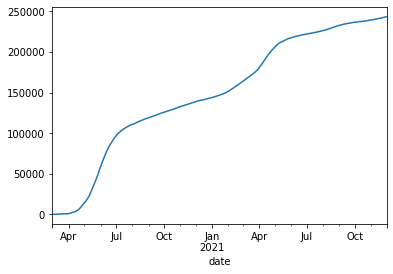

In [6]:
df[df.location=='Qatar'].total_cases.plot()

In [7]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,642.000000,642.000000,637.000000,614.000000,614.000000,637.000000,642.000000,642.000000,637.000000,614.000000,614.000000,637.000000,627.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,580.000000,5.880000e+02,588.000000,580.000000,588.000000,588.000000,0.0,0.0,2.420000e+02,1.260000e+02,1.250000e+02,0.0,216.000000,344.000000,242.000000,126.000000,125.000000,0.0,344.000000,206.000000,206.000000,640.000000,642.0,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,0.0,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,0.0,6.420000e+02,6.420000e+02,6.420000e+02,21.000000,21.000000,21.000000,21.000000
mean,149218.791277,379.450156,381.684242,329.172638,0.995114,0.959251,50918.808819,129.482026,130.244378,112.325513,0.339489,0.327221,1.023046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4739.227586,1.296860e+06,442.535260,1.617191,4738.491497,1.616930,NaN,NaN,3.217630e+06,1.722645e+06,1.405430e+06,NaN,18783.629630,14451.380814,109.796983,58.782857,47.958400,NaN,4931.369186,11100.364078,0.378743,65.583078,2930524.0,2.273220e+02,3.190000e+01,1.307000e+00,6.170000e-01,1.169356e+05,NaN,1.766900e+02,1.652000e+01,8.000000e-01,2.690000e+01,NaN,1.200000e+00,8.023000e+01,8.480000e-01,441.790476,17.398571,22.749048,150.754772
std,73966.781809,394.631033,388.983516,208.571157,1.706425,1.449190,25240.121491,134.662276,132.735142,71.171948,0.582273,0.494509,0.261317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370.599397,8.503872e+05,290.182621,0.467695,1210.719348,0.413164,NaN,NaN,1.454683e+06,4.252448e+05,4.512688e+05,NaN,11240.399708,10229.416774,49.638973,14.510853,15.399215,NaN,3490.631601,3508.616286,0.119697,13.963833,0.0,1.393750e-12,8.533161e-14,9.777581e-15,3.999919e-15,3.058285e-10,NaN,1.479081e-12,2.631058e-13,7.777621e-15,1.706632e-13,NaN,9.999798e-15,9.244258e-13,6.444314e-15,292.999124,6.411489,28.620796,99.981820
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.341000,0.000000,0.341000,0.341000,0.000000,0.000000,0.470000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.000000,5.309000e+03,1.812000,0.059000,415.000000,0.142000,NaN,NaN,0.000000e+00,1.000000e+05,5.549820e+05,NaN,1214.000000,1351.000000,0.000000,3.410000,18.940000,NaN,461.000000,2051.000000,0.070000,13.890000,2930524.0,2.273220e+02,3.190000e+01,1.307000e+00,6.170000e-01,1.169356e+05,NaN,1.766900e+02,1.652000e+01,8.000000e-01,2.690000e+01,NaN,1.200000e+00,8.023000e+01,8.480000e-01,13.800000,3.670000,-14.420000,4.709055
25%,112449.750000,149.250000,150.429000,196.000000,0.000000,0.143000,38371.891500,50.929250,51.332000,66.882000,0.000000,0.049000,0.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4085.500000,5.161012e+05,176.112000,1.394500,4234.750000,1.444750,NaN

In [8]:
df.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vac

In [9]:
df1 = df[['total_cases', 'new_cases',
       'total_deaths', 'new_deaths',
       'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million',]]

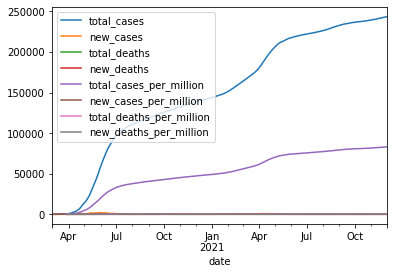

In [10]:
df1.plot()

In [11]:
df2 = df[['new_cases',
       'total_deaths', 'new_deaths',
       'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million',]]

In [12]:
df2

,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
date,,,,,,,
2020-02-29,1.0,NaN,NaN,0.341,0.341,NaN,NaN
2020-03-01,2.0,NaN,NaN,1.024,0.682,NaN,NaN
2020-03-02,0.0,NaN,NaN,1.024,0.000,NaN,NaN
2020-03-03,4.0,NaN,NaN,2.389,1.365,NaN,NaN
2020-03-04,1.0,NaN,NaN,2.730,0.341,NaN,NaN
...,...,...,...,...,...,...,...
2021-11-27,155.0,611.0,0.0,82913.158,52.892,208.495,0.0
2021-11-28,153.0,611.0,0.0,82965.367,52.209,208.495,0.0
2021-11-29,158.0,611.0,0.0,83019.283,53.915,208.495,0.0


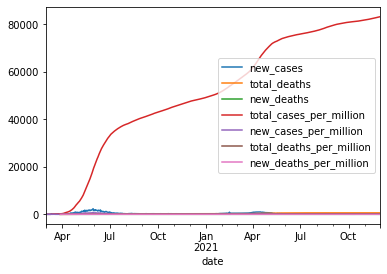

In [13]:
df2.plot()

Спрогнозируем общее количество заболевших на один миллион человек


In [14]:
df3 = df[['total_cases_per_million']]

In [15]:
df3

,total_cases_per_million
date,
2020-02-29,0.341
2020-03-01,1.024
2020-03-02,1.024
2020-03-03,2.389
2020-03-04,2.730
...,...
2021-11-27,82913.158
2021-11-28,82965.367
2021-11-29,83019.283


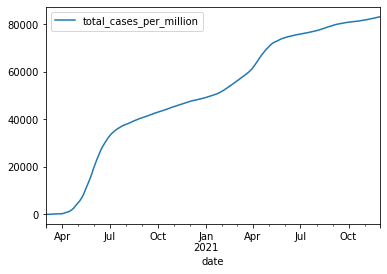

In [16]:
df3.plot()

Количество заболевших возрастает

Гипотеза: общее количество случаев заболевших на миллион человек после 5 апреля 2021 года: с 5 апреля по 5 мая

In [17]:
df4 = df3[:'2021-04-05']

Собираем исторические данные

In [18]:
df4

,total_cases_per_million
date,
2020-02-29,0.341
2020-03-01,1.024
2020-03-02,1.024
2020-03-03,2.389
2020-03-04,2.730
...,...
2021-04-01,61696.816
2021-04-02,61995.056
2021-04-03,62291.931


Проводим предварительный разведочный анализ данных

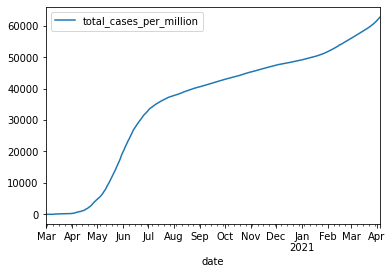

In [20]:
df4.plot()

Определяем наличие тренда и сезонности

Выполним декомпозицию

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
r = seasonal_decompose(df4['total_cases_per_million'],model='additive')

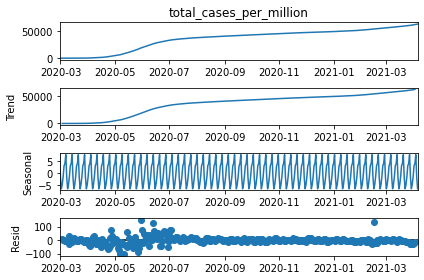

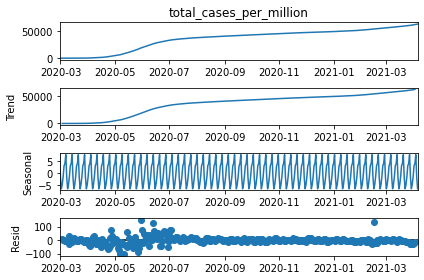

In [23]:
r.plot()

Тренд возрастает, сезонная компонента плюс/минус 5, диапазон от 0 до 60000, сезонные колебания выделяются в районе 5 дней, остатки колеблются в районе от - 100 до 100 дней

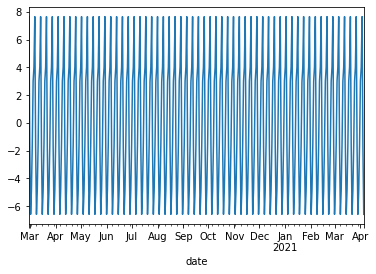

In [24]:
r.seasonal.plot()

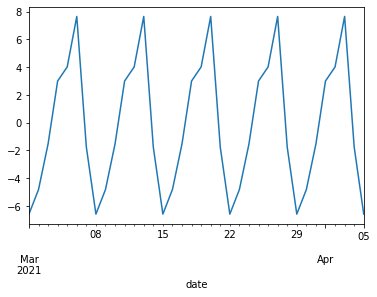

In [25]:
r.seasonal['2021-03-01':'2021-04-30'].plot()

Наблюдаем недельные колебания от плюс 8 до минус 6 человек

Остатки

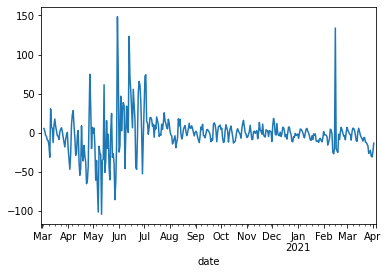

In [26]:
r.resid.plot()

Остатки (плюс 150, минус 100) превышают сезонность. Сезонность хоть и выделена, но меньше, чем случайые колебания

Выбираем модель ARIMA

In [27]:
!pip install pmdarima

In [28]:
import pandas as pd
import numpy as np
%matplotlib inline

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima

In [31]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [32]:
import pandas as pd
import numpy as np
%matplotlib inline

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [34]:
auto_arima(df4['total_cases_per_million'],seasonal=True,d=7).summary()

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(5,7,1)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 709, in fit
    skip_hessian=True, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py", line 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  402
Model:               SARIMAX(5, 7, 0)   Log Likelihood               -2517.204
Date:                Mon, 20 Dec 2021   AIC                           5046.409
Time:                        15:34:10   BIC                           5070.282
Sample:                             0   HQIC                          5055.867
                                - 402                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.7351      0.018   -154.284      0.000      -2.770      -2.700
ar.L2         -3.8714      0.046    -85.055      0.000      -3.961      -3.782
ar.L3         -3.4869      0.062    -56.375      0.000      -3.608      -3.366
ar.L4         -1.9935      0.050    -39.587      0.000      -2.092      -1.895
ar.L5         -0.5878      0.021    -27.808      0.000      -0.629      -0.546
sigma2      1.995e+04    599.323     33.279      0.000    1.88e+04    2.11e+04
===================================================================================
Ljung-Box (L1) (Q):                  40.25   Jarque-Bera (JB):              1815.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Разбиваем выборку на обучающую и тестовую

In [36]:
train = df4[:'2021-03-05']
test = df4['2021-03-06':]

In [37]:
train

,total_cases_per_million
date,
2020-02-29,0.341
2020-03-01,1.024
2020-03-02,1.024
2020-03-03,2.389
2020-03-04,2.730
...,...
2021-03-01,56009.437
2021-03-02,56167.429
2021-03-03,56328.152


In [38]:
test

,total_cases_per_million
date,
2021-03-06,56807.247
2021-03-07,56968.993
2021-03-08,57128.691
2021-03-09,57289.413
2021-03-10,57450.818
2021-03-11,57610.516
2021-03-12,57765.778
2021-03-13,57930.595
2021-03-14,58096.095


In [40]:
model = SARIMAX(train['total_cases_per_million'],order=(5, 7, 0),seasonal_order=(1, 0, 1, 7))
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             total_cases_per_million   No. Observations:                  371
Model:             SARIMAX(5, 7, 0)x(1, 0, [1], 7)   Log Likelihood               -2323.031
Date:                             Mon, 20 Dec 2021   AIC                           4662.062
Time:                                     15:49:19   BIC                           4693.240
Sample:                                 02-29-2020   HQIC                          4674.454
                                      - 03-05-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.7740      0.023   -118.843      0.000      -2.820      -2.728
ar.L2         -3.9493      0.059    -66.539      0.000      -4.066      -3.833
ar.L3         -3.6284      0.082    -44.055      0.000      -3.790      -3.467
ar.L4         -2.1162      0.069    -30.449      0.000      -2.252      -1.980
ar.L5         -0.5845      0.029    -20.368      0.000      -0.641      -0.528
ar.S.L7       -0.3619      0.095     -3.826      0.000      -0.547      -0.176
ma.S.L7       -0.0318      0.125     -0.253      0.800      -0.277       0.214
sigma2      2.028e+04    762.875     26.579      0.000    1.88e+04    2.18e+04
===================================================================================
Ljung-Box (L1) (Q):                  24.80   Jarque-Bera (JB):              1142.75
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Делаем прогноз

In [41]:
predictions = results.predict(start='2021-03-06', end='2021-04-05', dynamic=False, typ='levels').rename('Predictions')

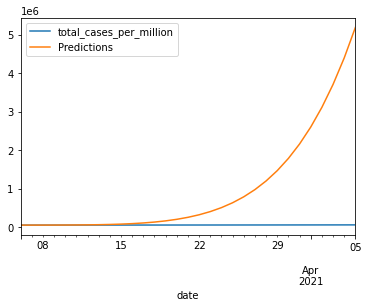

In [42]:
test['total_cases_per_million'].plot(legend=True)
predictions.plot(legend=True)

Прогноз на неделю хороший, затем ухудшается

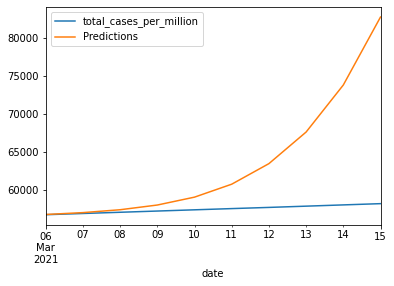

In [43]:
test['total_cases_per_million']['2021-03-06':'2021-03-15'].plot(legend=True,)
predictions['2021-03-06':'2021-03-15'].plot(legend=True)